# Fremont Bridge Bicycle Counter

## Analisys 

This project was take it on Jake's youtube channel; Reproducible Data Analysis in Jupyter

In [5]:
URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

In [6]:
from urllib.request import urlretrieve
urlretrieve(URL, "Fremont.csv")

('Fremont.csv', <http.client.HTTPMessage at 0x11a74e75b20>)

In [9]:
import pandas as pd
data= pd.read_csv("Fremont.csv", index_col="Date", parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


Traceback (most recent call last):
  File "C:\Users\Yira\Anaconda\Scripts\matplotlib-script.py", line 10, in <module>
    sys.exit(plotting._matplotlib())
AttributeError: module 'pandas.plotting' has no attribute '_matplotlib'


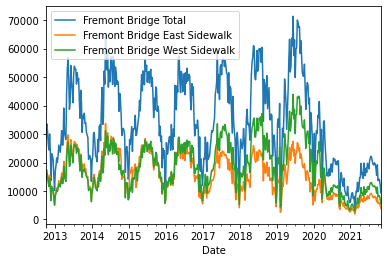

In [11]:
!matplotlib inline
data.resample("W").sum().plot();

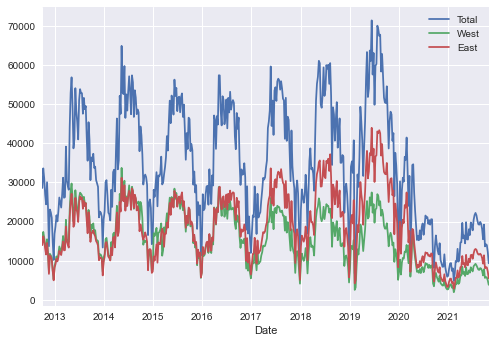

In [18]:
import matplotlib.pyplot as plt
plt.style.use ("seaborn")

data.columns = ["Total","West", "East"]

data.resample("W").sum().plot();

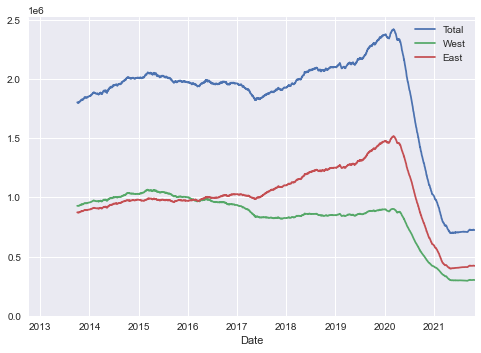

In [21]:
ax= data.resample("D").sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

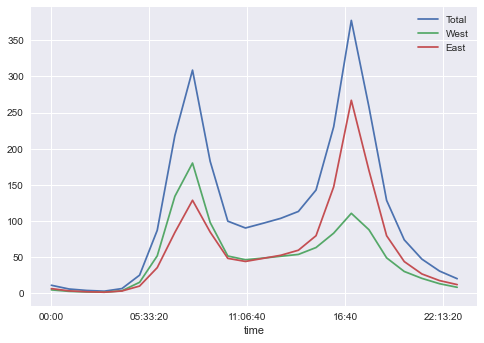

In [22]:
data.groupby(data.index.time).mean().plot();

In [23]:
pivoted = data.pivot_table("Total", index = data.index.time, columns = data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


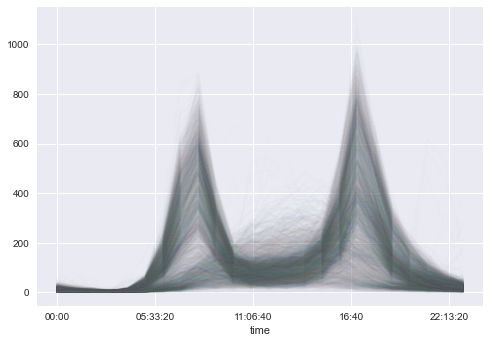

In [25]:
pivoted.plot(legend=False, alpha= 0.01);